In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('fashion-mnist_test.csv')

In [4]:
df.info()
df.isnull().sum() 
#last value is 255.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [5]:
df.sample(30)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9914,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7383,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6361,0,0,0,0,0,0,0,0,0,0,...,86,0,0,0,0,0,0,0,0,0
9125,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3740,1,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
3628,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9347,1,0,0,0,0,0,0,0,0,0,...,154,128,104,0,0,0,0,0,0,0
4654,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
9773,1,0,0,0,0,0,0,0,0,0,...,61,0,0,0,0,0,0,0,0,0
7754,0,0,0,0,0,0,0,0,0,0,...,131,119,105,49,0,0,0,0,1,0


In [6]:
# Split the dataset into features (pixels) and labels (target)

features = df.drop('label', axis=1)
labels = df['label']

In [7]:
print("features**********************",'\n',features)
print("labels**********************",'\n',labels)

features********************** 
       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0          0       0       0       0       0       0       0       9       8   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0      14      53      99   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
9995       0       0       0       0       0       0       0       0       0   
9996       0       0       0       0       0       0       0       0       0   
9997       0       0       0       0       0       0       0       0       0   
9998       0       1       3       0       0       0       0       0       0   
9999       0       0       0       0       0       0       0     140     119   

      

In [8]:
# Normalize pixel values to be in the range [0, 1]

features = features / 255.0
features

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.035294,0.031373,0.000000,...,0.403922,0.341176,0.219608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.054902,0.207843,0.388235,0.066667,...,0.000000,0.000000,0.000000,0.000000,0.247059,0.207843,0.121569,0.000000,0.000000,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.631373,...,0.537255,0.494118,0.549020,0.000000,0.521569,0.878431,0.870588,0.219608,0.000000,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.145098,...,0.125490,0.090196,0.054902,0.078431,0.000000,0.000000,0.003922,0.000000,0.000000,0.0
9996,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.007843,0.203922,0.090196,0.109804,0.000000,0.000000,0.0
9997,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.686275,0.674510,0.674510,0.713725,0.780392,0.870588,0.164706,0.000000,0.003922,0.0
9998,0.0,0.003922,0.011765,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.0


In [9]:
# Convert features and labels to NumPy arrays

features = np.array(features)
labels = np.array(labels)

In [10]:
labels

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [11]:
features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00392157,
        0.        ],
       [0.        , 0.00392157, 0.01176471, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
features = np.array(features)
labels = np.array(labels)
features = features.reshape(-1,784)

In [13]:
features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00392157,
        0.        ],
       [0.        , 0.00392157, 0.01176471, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [14]:
# Reshape the labels to be one-dimensional

labels = labels.reshape(-1)

In [15]:
labels

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

# build ANN model

In [16]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Initialize a new model
model = Sequential()

# Define the model architecture
model.add(Conv2D(64, (5, 5), padding="same", activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with reshaped input data and correct labels
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))



c:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 784), dtype=float32). Expected shape (None, 28, 28, 1), but input has incompatible shape (None, 784)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 784), dtype=float32)
  • training=True
  • mask=None

In [ ]:
# Compile the model
models.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#epochs 10 kiya to loss = 0.29 aya and accuracy = 0.86 smothing 
#epochs 20 kiya to loss = 0.09 aya and accuracy = 0.96 smothing 

models.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 256)      │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,618,698 (6.17 MB)

 Trainable params: 1,618,698 (6.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model with correct spelling of validation_data
# Train the model with correct spelling of validation_data
# Train the model without specifying validation data
# Reshape the input data to the expected shape for the model
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Train the model with the correct input shape and labels
history = models.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# You can plot the training and validation loss and accuracy using the history object
# Accuracy vs. Epoch plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


Epoch 1/20


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [ ]:
# # Accuracy vs Epoch plot
# plt.plot(history.history['sparse_categorical_crossentropy'])
# plt.plot(history.history['val_sparse_categorical_accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
# plt.show()

KeyError: 'sparse_categorical_crossentropy'

In [ ]:
# Predict on the test set
predictions = model.predict(features)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[8.3781403e-01, 2.7693565e-07, 5.6086847e-08, ..., 1.6275984e-11,
        3.5458290e-09, 5.1584865e-11],
       [1.4893043e-20, 1.0000000e+00, 6.2347149e-20, ..., 7.5495979e-26,
        1.9389316e-36, 7.2741441e-29],
       [2.4556292e-03, 2.2086379e-05, 9.9720484e-01, ..., 1.3611984e-08,
        5.0174884e-07, 3.1905850e-07],
       ...,
       [9.1068779e-23, 1.4544330e-20, 1.0647381e-15, ..., 1.7263732e-26,
        1.0000000e+00, 2.2433478e-28],
       [1.5320491e-05, 4.8382693e-09, 2.9287571e-07, ..., 6.5576676e-11,
        9.9989569e-01, 1.2066937e-11],
       [7.6597673e-04, 9.9859005e-01, 6.4184499e-04, ..., 1.0601211e-10,
        5.2431925e-13, 5.9342545e-11]], dtype=float32)

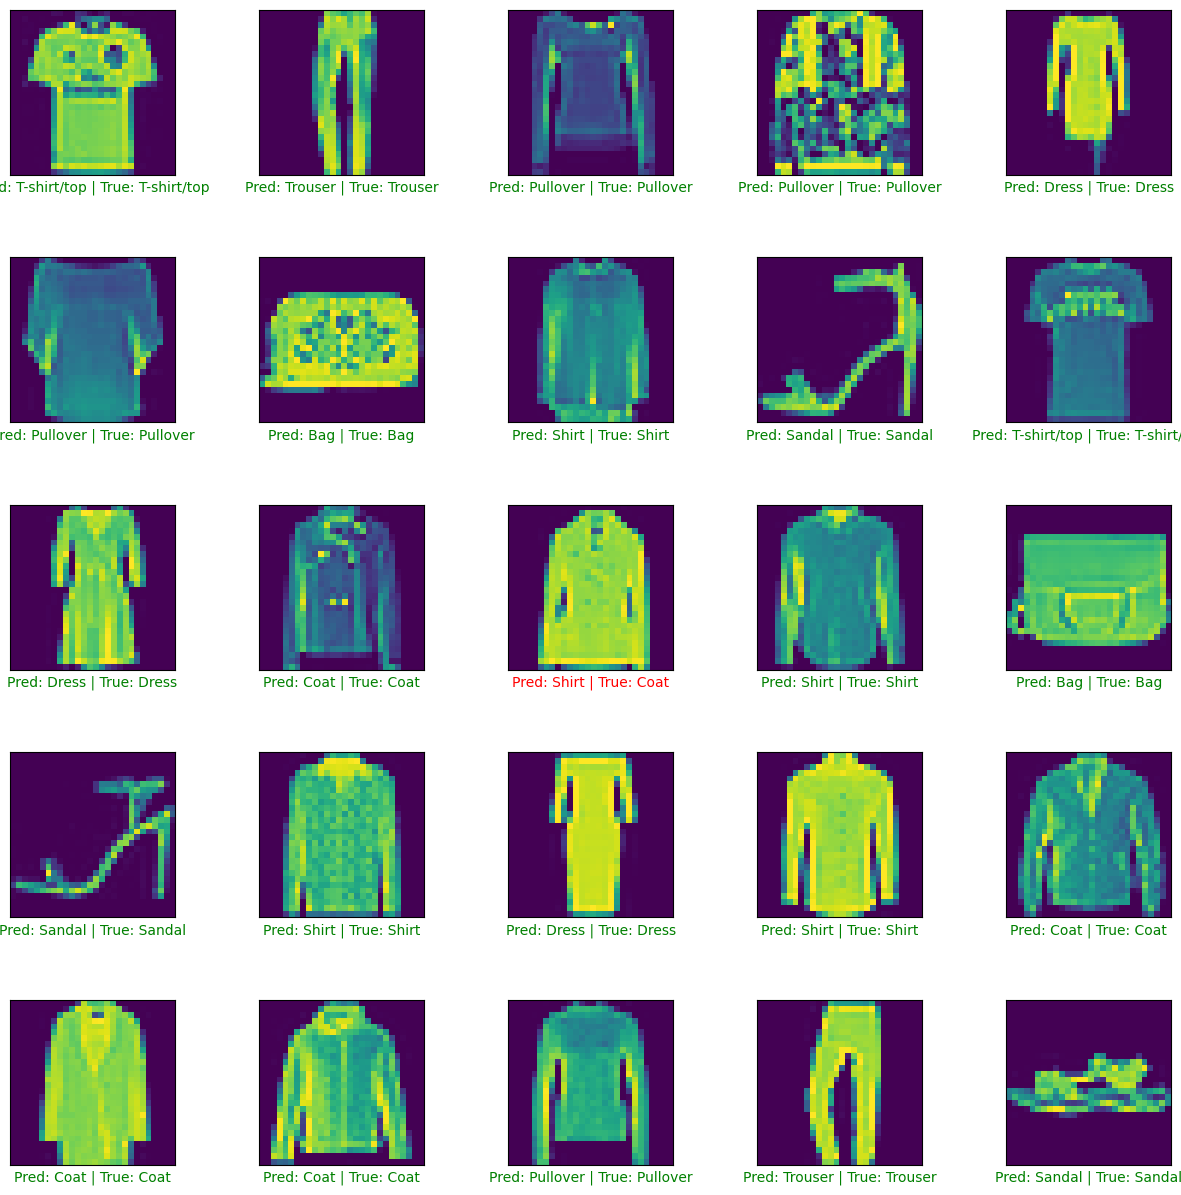

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(15, 15))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    # Reshape the flattened image to its original shape (28x28)
    image = features[i].reshape(28, 28)
    
    plt.imshow(image, cmap='viridis')  # Change the colormap to 'viridis' for more colorful images
    predicted_label = np.argmax(predictions[i])
    true_label = labels[i]
    
    if predicted_label == true_label:
        label_color = 'green'
        label_text = f"Pred: {class_names[predicted_label]} | True: {class_names[true_label]}"
    else:
        label_color = 'red'
        label_text = f"Pred: {class_names[predicted_label]} | True: {class_names[true_label]}"
        
    # Use class_names list to display class names instead of numerical labels
    plt.xlabel(label_text, color=label_color)

plt.show()
